## Important library

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import requests
import json
from sklearn.metrics import silhouette_samples,silhouette_score
from pandas import json_normalize
import folium


## Importing the data set

In [3]:
df=pd.read_csv(r"D:\DBDA\project files\New folder\food_coded.csv")
df.head(5)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


## Let's dive in to the data cleaning.

### After observing the data thoroughly.
1) data set have multiple NaN values.<br>
2) Many columns don't make any sense in this case.<br>
3) Most of the columns in data set are already scalled, so again scalling won't be necessary.<br>

In [1]:
df.info()

NameError: name 'df' is not defined

<Axes: >

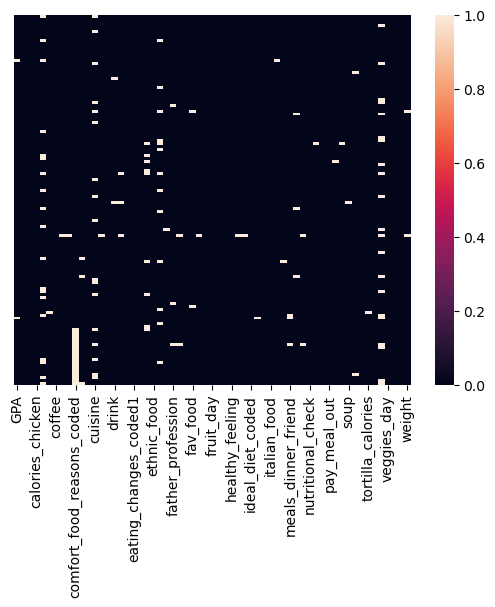

In [4]:
sns.heatmap(df.isnull(),yticklabels=False )

In [5]:
df.isnull().sum()

GPA                  2
Gender               0
breakfast            0
calories_chicken     0
calories_day        19
                    ..
type_sports         21
veggies_day          0
vitamins             0
waffle_calories      0
weight               2
Length: 61, dtype: int64

## After going through data set thoroghly,I decided to use different approach, instead of dropning the unwanted columns , I added useful columns in variable x. 

In [6]:
x= df[["cook","eating_out","employment","ethnic_food","exercise","fruit_day","income","on_off_campus","pay_meal_out","sports","veggies_day"]]
x.head(10)

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
5,3.0,1,3.0,4,2.0,2,1.0,1.0,5,2.0,1
6,2.0,2,3.0,5,1.0,4,4.0,2.0,2,1.0,4
7,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4
8,3.0,5,2.0,5,NaN,4,5.0,1.0,3,2.0,3
9,3.0,3,3.0,5,1.0,5,4.0,1.0,3,1.0,5


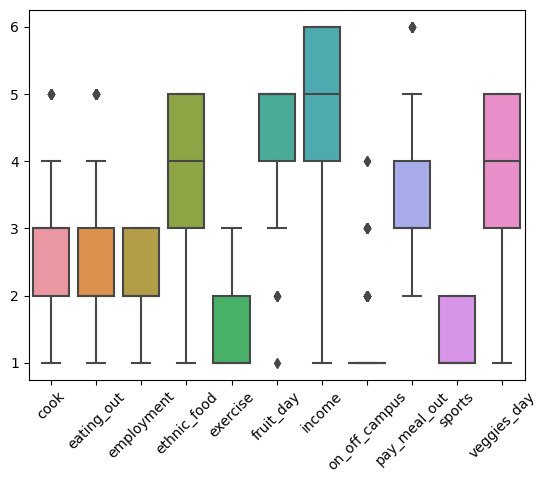

<Figure size 1100x800 with 0 Axes>

In [7]:
a=sns.boxplot(x)
plt.figure(figsize=(11, 8))
a.set_xticklabels(a.get_xticklabels(), rotation=45)
plt.show()

In [8]:
x.isnull().sum()

cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64

## Fill up NAN value by Mean.

In [9]:
x['cook']=x['cook'].fillna(x['cook'].mean())
x['employment']=x['employment'].fillna(x['employment'].mean())
x['exercise']=x['exercise'].fillna(x['exercise'].mean())
x['income']=x['income'].fillna(x['income'].mean())
x['on_off_campus']=x['on_off_campus'].fillna(x['on_off_campus'].mean())
x['sports']=x['sports'].fillna(x['sports'].mean())

In [10]:
x.isnull().sum()

cook             0
eating_out       0
employment       0
ethnic_food      0
exercise         0
fruit_day        0
income           0
on_off_campus    0
pay_meal_out     0
sports           0
veggies_day      0
dtype: int64

### From  heatmap I can conclude that new dataset do not have any null values.

<Axes: >

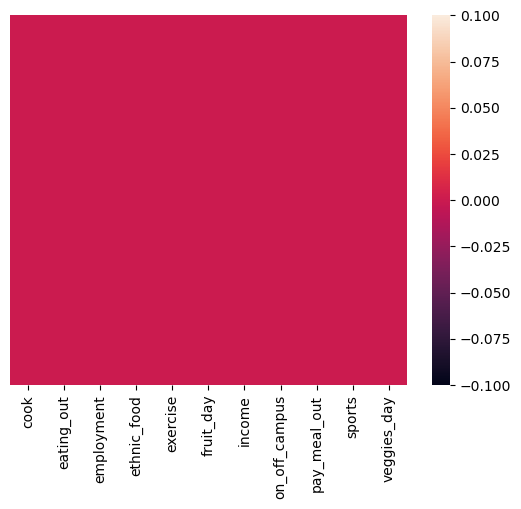

In [11]:
sns.heatmap(x.isnull(), yticklabels=False)

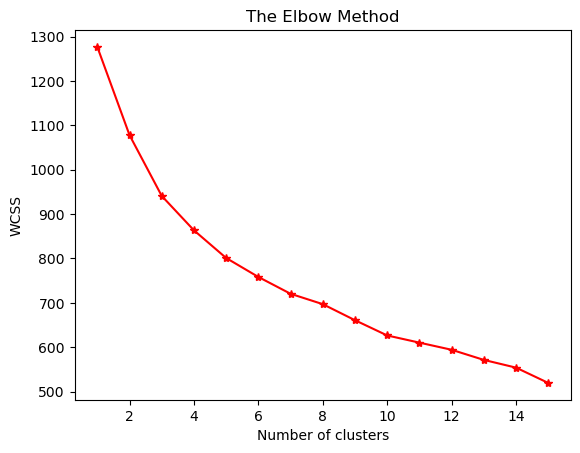

In [12]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 16), wcss,marker='*',color='r')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

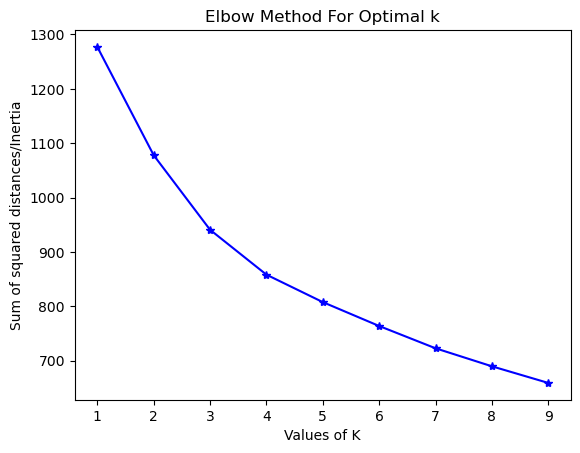

In [13]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'b*-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

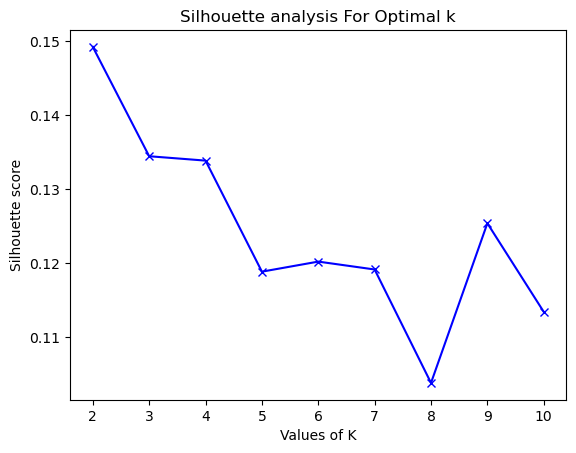

In [14]:

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10 ]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(x)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(x, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

## from elbow method it is hard to predict the optimum number of k, to find best optimum value of k I'll go with Silhouette analysis.


In [15]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
clusters = kmeans.fit_predict(x)
clusters

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [16]:
x.conca

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.000000,3,3.0,1,1.0,5,5.0,1.0,2,1.000000,5
1,3.000000,2,2.0,4,1.0,4,4.0,1.0,4,1.000000,4
2,1.000000,2,3.0,5,2.0,5,6.0,2.0,3,2.000000,5
3,2.000000,2,3.0,5,3.0,4,6.0,1.0,2,2.000000,3
4,1.000000,2,2.0,4,1.0,4,6.0,1.0,4,1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...
120,3.000000,2,1.0,4,2.0,5,4.0,3.0,4,1.000000,5
121,3.000000,4,3.0,3,2.0,4,2.0,1.0,4,1.390244,5
122,3.000000,3,3.0,5,2.0,4,2.0,1.0,4,2.000000,4
123,3.000000,5,2.0,2,1.0,5,4.0,1.0,3,2.000000,3


In [15]:


url = "https://api.foursquare.com/v3/places/search"
common_params = {
    "ll": "18.5204,73.8567",
    "sort": "DISTANCE",
    "limit": 40,
    "radius": 50000,
   
}
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3UV+vMH3IZlTTBCnOGupsv3Y5os4yeXDimV4kFnfokDA=",
}
categories = ["gym", "school", "juice","Restaurant","apartments"]

# Create an empty list to store the data for each category
results = []

for category in categories:
    
    params = {**common_params, "query": category}
    response = requests.get(url, params=params, headers=headers)
    
    location = response.json()
    print("="*70)
    print("category of data :" ,category)  
    print(location)


category of data : gym
{'results': [{'fsq_id': '4e27ba5518a83a13622b1db9', 'categories': [{'id': 18021, 'name': 'Gym and Studio', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}}], 'chains': [], 'distance': 433, 'geocodes': {'main': {'latitude': 18.519303, 'longitude': 73.852905}, 'roof': {'latitude': 18.519303, 'longitude': 73.852905}}, 'link': '/v3/places/4e27ba5518a83a13622b1db9', 'location': {'address': 'N. E. S. Ramanbaug', 'country': 'IN', 'cross_street': '', 'formatted_address': 'N. E. S. Ramanbaug'}, 'name': 'Ramanbaug Gym', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '8dc598c777c54351552ea6e0', 'categories': [{'id': 18028, 'name': 'Yoga Studio', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_yogastudio_', 'suffix': '.png'}}], 'chains': [], 'distance': 642, 'geocodes': {'main': {'latitude': 18.516504, 'longitude': 73.8522}}, 'link': '/v3/places/8dc598c777c54351552ea6e0', 'location': {'address':

In [16]:
dataframe1=pd.DataFrame.from_dict(pd.json_normalize(location["results"]))
dataframe1

,fsq_id,categories,chains,distance,link,name,timezone,geocodes.drop_off.latitude,geocodes.drop_off.longitude,geocodes.main.latitude,...,geocodes.roof.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,location.address_extended,related_places.children
0,4ebafa5b9911053f4e46ce6e,"[{'id': 11028, 'name': 'Construction', 'icon':...",[],960,/v3/places/4ebafa5b9911053f4e46ce6e,Sampada Nagari,Asia/Kolkata,18.522202,73.865814,18.521714,...,73.865740,307 Somwar Peth,IN,,"307 Somwar Peth, Pune 411011, Mahārāshtra",Pune,411011,Mahārāshtra,NaN,NaN
1,4f815c32e4b020c7becd0709,"[{'id': 12094, 'name': 'Residential Building',...",[],1120,/v3/places/4f815c32e4b020c7becd0709,Parth Society,Asia/Kolkata,NaN,NaN,18.517282,...,73.866819,NaN,IN,,,NaN,NaN,NaN,NaN,NaN
2,5034d4d7e4b0cc4009aa7b28,"[{'id': 12094, 'name': 'Residential Building',...",[],1283,/v3/places/5034d4d7e4b0cc4009aa7b28,Ganeshkunj Society,Asia/Kolkata,18.510282,73.850834,18.510248,...,73.850608,Narveer Krantiveer Vasudev Phadke Road,IN,Narayan Peth,Narveer Krantiveer Vasudev Phadke Road (Naraya...,Pune,NaN,Mahārāshtra,NaN,NaN
3,4f64b915e4b098b395828f40,"[{'id': 12094, 'name': 'Residential Building',...",[],1574,/v3/places/4f64b915e4b098b395828f40,Pinnacle Pride,Asia/Kolkata,18.510233,73.846526,18.510113,...,73.846441,Sadashiv Peth Tilak Road,IN,,"Sadashiv Peth Tilak Road, Pune 411030, Maharas...",Pune,411030,Maharashtra,NaN,NaN
4,4fef084ae4b0c3c46dac547a,"[{'id': 12094, 'name': 'Residential Building',...",[],2473,/v3/places/4fef084ae4b0c3c46dac547a,Bhonde Colony,Asia/Kolkata,NaN,NaN,18.512244,...,73.834871,NaN,IN,,411016,NaN,411016,NaN,NaN,NaN
5,4b489775f964a520ff4f26e3,"[{'id': 13145, 'name': 'Fast Food Restaurant',...",[],2647,/v3/places/4b489775f964a520ff4f26e3,Marz O Rin,Asia/Kolkata,NaN,NaN,18.516560,...,73.878997,"Bakthiar Plaza, 6, Mg Road, Central Street Camp",IN,"M G Road, Camp","Bakthiar Plaza, 6, Mg Road, Central Street Cam...",Pune,411001,Mahārāshtra,Opposite Budhani Wafers,NaN
6,51e3f143498e52c6392339e1,"[{'id': 12094, 'name': 'Residential Building',...",[],2734,/v3/places/51e3f143498e52c6392339e1,Yogdeep Distributors,Asia/Kolkata,NaN,NaN,18.495738,...,73.858746,20 Mukundnagar,IN,,"20 Mukundnagar, Pune 411037, Mahārāshtra",Pune,411037,Mahārāshtra,NaN,NaN
7,4b5f059cf964a520a4a229e3,"[{'id': 13000, 'name': 'Dining and Drinking', ...",[],3015,/v3/places/4b5f059cf964a520a4a229e3,Cafe Coffee Day,Asia/Kolkata,NaN,NaN,18.514454,...,73.828949,"123 Law College Road, Law College Road",IN,,"123 Law College Road, Law College Road, Pune 4...",Pune,411004,Mahārāshtra,NaN,NaN
8,4e3ff9298877b00cfc674349,"[{'id': 12094, 'name': 'Residential Building',...",[],3083,/v3/places/4e3ff9298877b00cfc674349,The Narangi Baug,Asia/Kolkata,NaN,NaN,18.537566,...,73.879678,NaN,IN,,674349,NaN,674349,NaN,NaN,NaN
9,4ed87f98f790c04543603385,"[{'id': 12094, 'name': 'Residential Building',...",[],3131,/v3/places/4ed87f98f790c04543603385,Skylon Towers,Asia/Kolkata,NaN,NaN,18.539540,...,73.878457,NaN,IN,,,NaN,NaN,NaN,NaN,NaN


In [17]:
d1=dataframe1[["name","geocodes.roof.latitude","geocodes.roof.longitude"]]
d1.dropna()

,name,geocodes.roof.latitude,geocodes.roof.longitude
0,Sampada Nagari,18.521714,73.865740
1,Parth Society,18.517282,73.866819
2,Ganeshkunj Society,18.510248,73.850608
3,Pinnacle Pride,18.510113,73.846441
4,Bhonde Colony,18.512244,73.834871
5,Marz O Rin,18.516560,73.878997
6,Yogdeep Distributors,18.495738,73.858746
7,Cafe Coffee Day,18.514454,73.828949
8,The Narangi Baug,18.537566,73.879678
9,Skylon Towers,18.539540,73.878457


In [18]:
d1["cluster"] =0
selected_columns = ["name", "geocodes.roof.latitude", "geocodes.roof.longitude", "cluster"]
new_df = d1[selected_columns]
location_list1= new_df.dropna()
location_list1

,name,geocodes.roof.latitude,geocodes.roof.longitude,cluster
0,Sampada Nagari,18.521714,73.865740,0
1,Parth Society,18.517282,73.866819,0
2,Ganeshkunj Society,18.510248,73.850608,0
3,Pinnacle Pride,18.510113,73.846441,0
4,Bhonde Colony,18.512244,73.834871,0
5,Marz O Rin,18.516560,73.878997,0
6,Yogdeep Distributors,18.495738,73.858746,0
7,Cafe Coffee Day,18.514454,73.828949,0
8,The Narangi Baug,18.537566,73.879678,0
9,Skylon Towers,18.539540,73.878457,0


In [19]:


url = "https://api.foursquare.com/v3/places/search"
common_params = {
    "ll": "18.5913,73.7389",
    "sort": "DISTANCE",
    "limit": 40,
    "radius": 50000,
   
}
headers = {
    "Accept": "application/json",
    "Authorization": "fsq3UV+vMH3IZlTTBCnOGupsv3Y5os4yeXDimV4kFnfokDA=",
}
categories = ["gym", "school", "juice","Restaurant","apartments"]

# Create an empty list to store the data for each category
results = []

for category in categories:
    
    params = {**common_params, "query": category}
    response = requests.get(url, params=params, headers=headers)
    
    location = response.json()
    print("="*70)
    print("category of data :" ,category)  
    print(location)


category of data : gym
{'results': [{'fsq_id': '4fc48c38e4b027539f710c27', 'categories': [{'id': 18021, 'name': 'Gym and Studio', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}}], 'chains': [], 'distance': 253, 'geocodes': {'main': {'latitude': 18.589336, 'longitude': 73.737929}}, 'link': '/v3/places/4fc48c38e4b027539f710c27', 'location': {'country': 'IN', 'cross_street': '', 'formatted_address': ''}, 'name': 'PSL Gym', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '5a09ba514420d84d095b582e', 'categories': [{'id': 18021, 'name': 'Gym and Studio', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}}], 'chains': [], 'distance': 342, 'geocodes': {'main': {'latitude': 18.594194, 'longitude': 73.740131}, 'roof': {'latitude': 18.594194, 'longitude': 73.740131}}, 'link': '/v3/places/5a09ba514420d84d095b582e', 'location': {'address': 'Bhatewara', 'country': 'IN', 'cross_street': 'Dange Chowk 

In [20]:
dataframe2=pd.DataFrame.from_dict(pd.json_normalize(location["results"]))
dataframe2

,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,location.address,...,location.formatted_address,location.locality,location.region,geocodes.roof.latitude,geocodes.roof.longitude,location.address_extended,location.postcode,related_places.children,geocodes.drop_off.latitude,geocodes.drop_off.longitude
0,5394466d498e4cf319b5921f,"[{'id': 12094, 'name': 'Residential Building',...",[],1509,/v3/places/5394466d498e4cf319b5921f,Atlanta Apartments,Asia/Kolkata,18.591730,73.753167,Wakad,...,"Wakad, Pune, Mahārāshtra",Pune,Mahārāshtra,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,57b87d37498e07c6772b2650,"[{'id': 11000, 'name': 'Business and Professio...",[],2246,/v3/places/57b87d37498e07c6772b2650,Echoing Greens Commercial,Asia/Kolkata,18.593687,73.760272,Sr.No.166/8,...,"Sr.No.166/8 (Nr. Hinjewadi Flyover), Pune 4110...",Pune,Mahārāshtra,18.593687,73.760272,"Opposite Edenn Towers, Wakad",411057,"[{'fsq_id': '5b66a6df471d6e002c02e347', 'name'...",NaN,NaN
2,515aea40e4b0de297bf46d27,"[{'id': 12094, 'name': 'Residential Building',...",[],2635,/v3/places/515aea40e4b0de297bf46d27,Crystal Heights,Asia/Kolkata,18.603889,73.760911,NaN,...,"Pimpri Chinchwad 411057, Maharashtra",Pimpri Chinchwad,Maharashtra,18.603889,73.760911,NaN,411057,NaN,NaN,NaN
3,531378f0498e21dac8489926,"[{'id': 12094, 'name': 'Residential Building',...",[],2961,/v3/places/531378f0498e21dac8489926,Bhakti Genesis,Asia/Kolkata,18.592300,73.767065,"Sr. No. 245, Shegde Vasti",...,"Sr. No. 245, Shegde Vasti (Aundh Wakad Road), ...",Pune,Mahārāshtra,NaN,NaN,NaN,411057,NaN,NaN,NaN
4,568e8145498e59d7df113564,"[{'id': 12094, 'name': 'Residential Building',...",[],2965,/v3/places/568e8145498e59d7df113564,Air Castles,Asia/Kolkata,18.582611,73.736471,Kasarsai Road,...,"Kasarsai Road (Marunje, Hinjewadi), Pune 41105...",Pune,Mahārāshtra,18.582611,73.736471,NaN,411057,NaN,NaN,NaN
5,52d92f12498eb1db70d1639d,"[{'id': 12094, 'name': 'Residential Building',...",[],3031,/v3/places/52d92f12498eb1db70d1639d,Balewadi Sports Village,Asia/Kolkata,18.572577,73.759577,NaN,...,,NaN,NaN,18.572577,73.759577,NaN,NaN,NaN,NaN,NaN
6,4f5305ace4b02d0eb418a769,"[{'id': 12094, 'name': 'Residential Building',...",[],3629,/v3/places/4f5305ace4b02d0eb418a769,Bhagwati Royale,Asia/Kolkata,18.606829,73.769309,"Gujar Nagar, Ther Gaon",...,"Gujar Nagar, Ther Gaon, Pimpri Chinchwad 41103...",Pimpri Chinchwad,Maharashtra,18.606829,73.769309,NaN,411033,NaN,NaN,NaN
7,519c1a24498e31796f79a8b9,"[{'id': 12094, 'name': 'Residential Building',...",[],3679,/v3/places/519c1a24498e31796f79a8b9,Palazzo,Asia/Kolkata,18.578949,73.771447,NaN,...,"Pune, Mahārāshtra",Pune,Mahārāshtra,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4fbf2f16e4b059998704d78f,"[{'id': 12094, 'name': 'Residential Building',...",[],3974,/v3/places/4fbf2f16e4b059998704d78f,Nandan Prospera,Asia/Kolkata,18.569972,73.769334,Baner,...,"Baner, Pune 411045, Maharashtra",Pune,Maharashtra,18.569972,73.769334,NaN,411045,NaN,NaN,NaN
9,4ba425bef964a5206c8638e3,"[{'id': 12094, 'name': 'Residential Building',...",[],4282,/v3/places/4ba425bef964a5206c8638e3,Woods,Asia/Kolkata,18.599885,73.778455,Opposite Fountain Inn,...,"Opposite Fountain Inn (Kalewadi Phata), Pune, ...",Pune,Mahārāshtra,18.599885,73.778455,NaN,NaN,NaN,NaN,NaN


In [21]:
d2=dataframe2[["name","geocodes.roof.latitude","geocodes.roof.longitude"]]
d2.dropna()

,name,geocodes.roof.latitude,geocodes.roof.longitude
1,Echoing Greens Commercial,18.593687,73.760272
2,Crystal Heights,18.603889,73.760911
4,Air Castles,18.582611,73.736471
5,Balewadi Sports Village,18.572577,73.759577
6,Bhagwati Royale,18.606829,73.769309
8,Nandan Prospera,18.569972,73.769334
9,Woods,18.599885,73.778455
10,Chandan Crest,18.584995,73.781327
11,Supriya Classic,18.560719,73.769761
12,KFC,18.565049,73.774455


In [22]:
d2["cluster"] =1
selected_columns = ["name", "geocodes.roof.latitude", "geocodes.roof.longitude", "cluster"]
new_df1 = d2[selected_columns]
location_list2=new_df1.dropna()

In [23]:
location_list2

,name,geocodes.roof.latitude,geocodes.roof.longitude,cluster
1,Echoing Greens Commercial,18.593687,73.760272,1
2,Crystal Heights,18.603889,73.760911,1
4,Air Castles,18.582611,73.736471,1
5,Balewadi Sports Village,18.572577,73.759577,1
6,Bhagwati Royale,18.606829,73.769309,1
8,Nandan Prospera,18.569972,73.769334,1
9,Woods,18.599885,73.778455,1
10,Chandan Crest,18.584995,73.781327,1
11,Supriya Classic,18.560719,73.769761,1
12,KFC,18.565049,73.774455,1


In [25]:


# Create a map centered at the specified location
map_clusters = folium.Map(location=[18.516726, 73.856255], zoom_start=11)

# Create a FeatureGroup to hold the markers
occurences = folium.FeatureGroup()

# Iterate through the DataFrame rows
for index, row in location_list1.iterrows():
    latitude = row["geocodes.roof.latitude"]
    longitude = row["geocodes.roof.longitude"]
    name = row["name"]
    
    # Create a CircleMarker for each location
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=3,
        tooltip=str(name),  # Display the name as a tooltip
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.9
    ).add_to(occurences)  # Add the marker to the FeatureGroup
    
for index, row in location_list2.iterrows():
    latitude = row["geocodes.roof.latitude"]
    longitude = row["geocodes.roof.longitude"]
    name = row["name"]
    
    # Create a CircleMarker for each location
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=3,
        tooltip=str(name),  # Display the name as a tooltip
        color="green",
        fill=True,
        fill_color="green",
        fill_opacity=0.9
    ).add_to(occurences)  # Add the marker to the FeatureGroup
    
# Add the FeatureGroup to the map
occurences.add_to(map_clusters)
map_clusters.save("clustered_map.html")
# Display the map
map_clusters
